In [50]:
from modules.fitness import *
from modules.analysis import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# pick a data set to use
# robustness_23x50 looks pretty good

In [61]:
ls data/

robustness_100x25_v1/ robustness_23x50_v0/  robustness_56x50_v1/
robustness_200x25_v0/ robustness_25x50_v0/  simulation.prof


In [86]:
# load simulation results
file_path = 'data/robustness_100x25_v1/'
results = load_results_from_json(file_path)

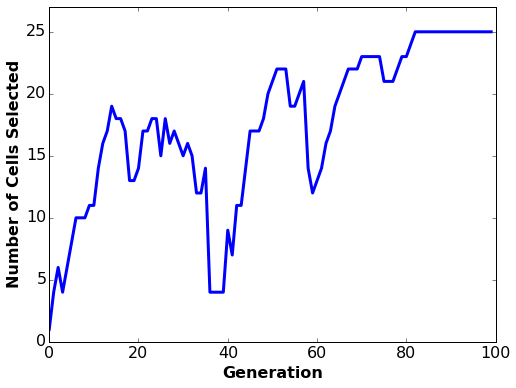

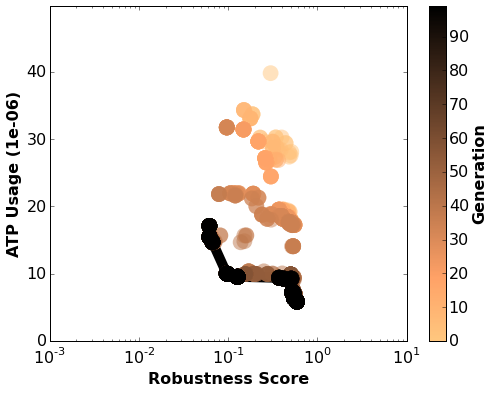

In [87]:
# plot population size
ax0 = plot_pareto_front_size(results)

# plot 2D evolutionary trajectory
ax1 = plot_2d_trajectory(results, obj=(0, 1), connect_front=True, labels=['Robustness Score', 'ATP Usage'])
# ax1.set_ylim(4.6e7, 4.8e7)
ax1.set_yscale('linear')
ax1.set_xscale('log')
_ = ax1.set_xlim(1e-3, 1e1)

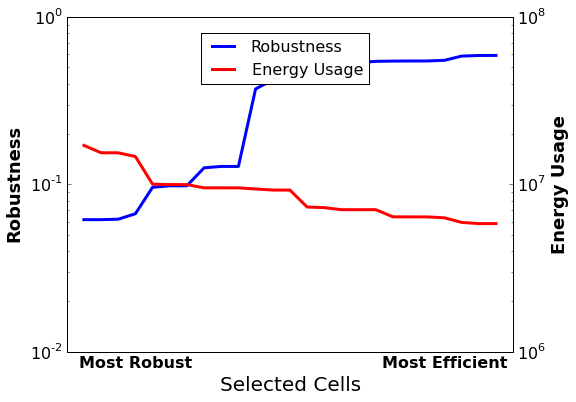

In [89]:
# get topological features from pareto front, ordered from most robust to most efficient
objectives, network_size, node_types, edge_types = get_topology_from_front(results)
    
# plot objective function scores vs position on pareto front
ax0, ax1 = plot_pareto_objective_tradeoff(metrics=[objectives['robustness'], objectives['energy_usage']], metric_names=['Robustness', 'Energy Usage'])
ax0.legend(loc=(0.3, 0.8), prop={'size': 16})
ax0.set_yscale('log')
ax1.set_yscale('log')
#ax1.set_ylim(0, 5e7)    
_ = ax1.yaxis.get_offset_text().set_size(20)


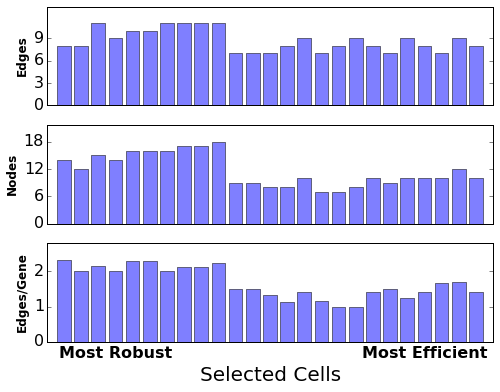

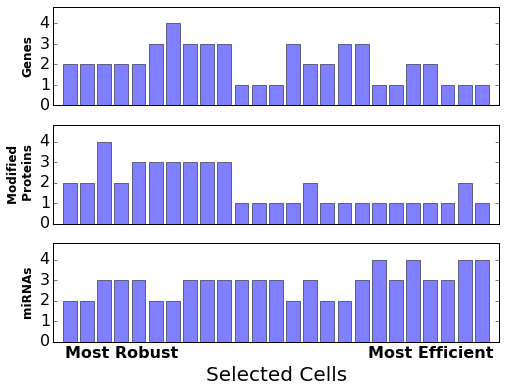

In [90]:
# plot network size distributions along front
ax2, ax3, ax4 = create_subplot_figure(dim=(3, 1), size=(8, 6))
plot_multiple_metrics(ax2, network_size['node_count'], metric_name='Edges', include_axis_label=False)
plot_multiple_metrics(ax3, network_size['edge_count'], metric_name='Nodes', include_axis_label=False)
plot_multiple_metrics(ax4, network_size['edges_per_gene'], metric_name='Edges/Gene', include_axis_label=True)

# plot node type distributions along front
ax5, ax6, ax7 = create_subplot_figure(dim=(3, 1), size=(8, 6))
plot_multiple_metrics(ax5, node_types['genes'], metric_name='Genes', include_axis_label=False)
plot_multiple_metrics(ax6, node_types['modified_proteins'], metric_name='Modified \n Proteins', include_axis_label=False)
plot_multiple_metrics(ax7, node_types['micro_rnas'], metric_name='miRNAs', include_axis_label=True)

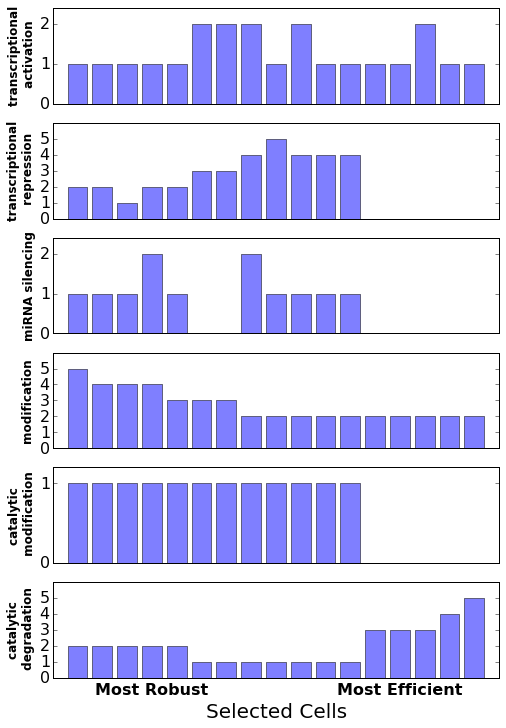

In [76]:
# plot edge type distributions along front

axes = create_subplot_figure(dim=(len(edge_types), 1), size=(8, 12))
plot_multiple_metrics(axes[0], edge_types['TA'], metric_name='transcriptional \n activation', include_axis_label=False)
plot_multiple_metrics(axes[1], edge_types['TR'], metric_name='transcriptional \n repression', include_axis_label=False)
plot_multiple_metrics(axes[2], edge_types['PTR'], metric_name='miRNA silencing', include_axis_label=False)
plot_multiple_metrics(axes[3], edge_types['M'], metric_name='modification', include_axis_label=False)
plot_multiple_metrics(axes[4], edge_types['CM'], metric_name='catalytic \n modification', include_axis_label=False)
plot_multiple_metrics(axes[5], edge_types['CD'], metric_name='catalytic \n degradation', include_axis_label=True)


In [ ]:
# plot edge type count vs rank
# plot downregulating edges  per input and downreg pet output on same pareto axis

True


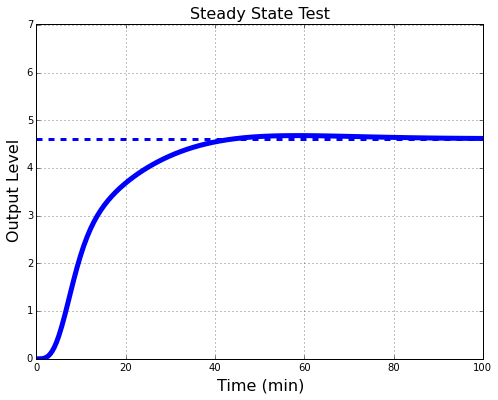

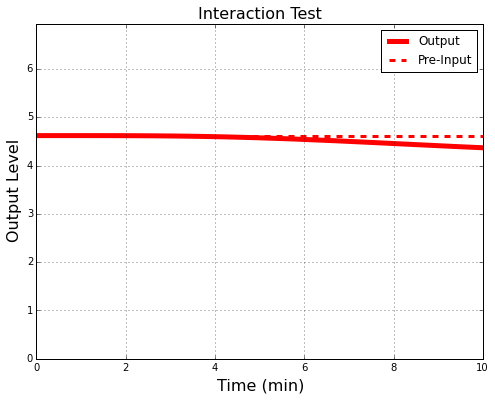

In [92]:
# analyze a single cell

# select a cell from the population
cell_num = 0
cell = list(results[len(results)-1].items())[cell_num][0]

# check it's steady state simulation results
steady_states = cell.get_steady_states(input_node=2, input_magnitude=1)
cell.plot_steady_states(input_node=2, input_magnitude=1, output_node=1)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--b', linewidth=3, label='Steady State')

# check its interaction test results
connected = cell.interaction_check_numerical(input_node=2, output_node=1, steady_states=steady_states, plot=True)
print(connected)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--r', linewidth=3, label='Pre-Input')
ax.legend(loc=0)

Reaction Type           Reactants    Enzymes    Products
----------------------  -----------  ---------  ----------
catalytic_degradation   [1]          [0]        []
modification            [0]          []         [4]
catalytic_modification  [4]          [1]        [0]
modification            [0]          []         [5]
miRNA_silencing         [3, 1]       []         []


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
repression                     2                       2
activation                     1                       1
repression                     2                       4
repression                     3                       2


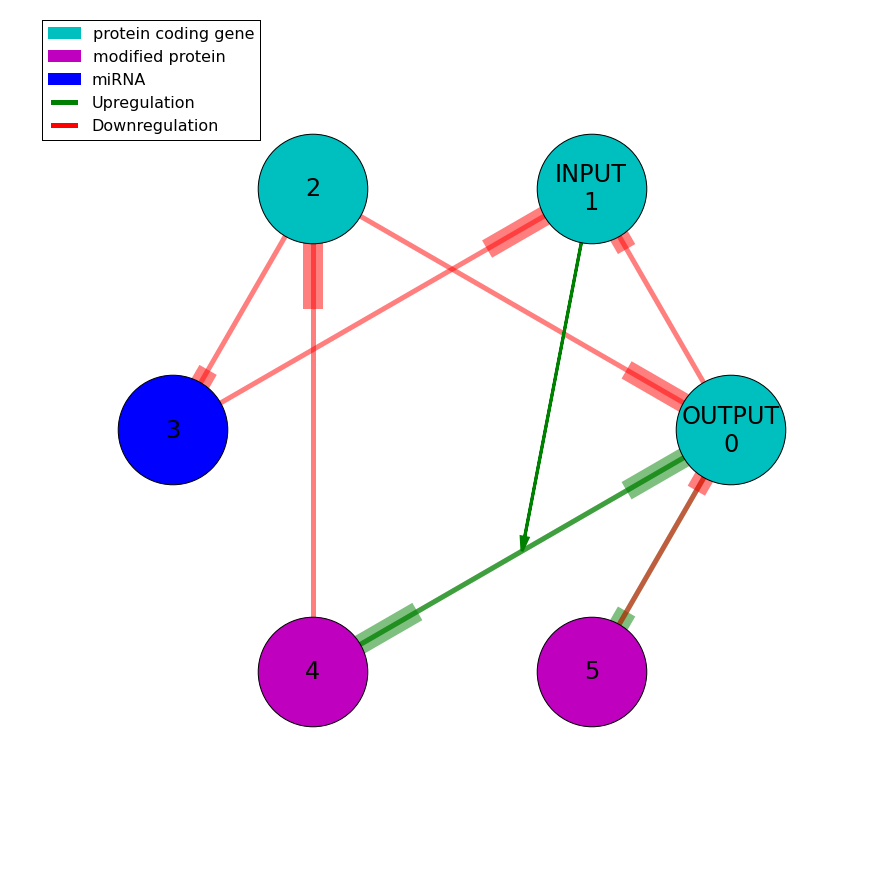

In [85]:
# generate table of all reactions and modifications
cell.show_reactions(grn_indices=True)

# generate network graph
cell.show_topology(input_node=2, output_node=1)

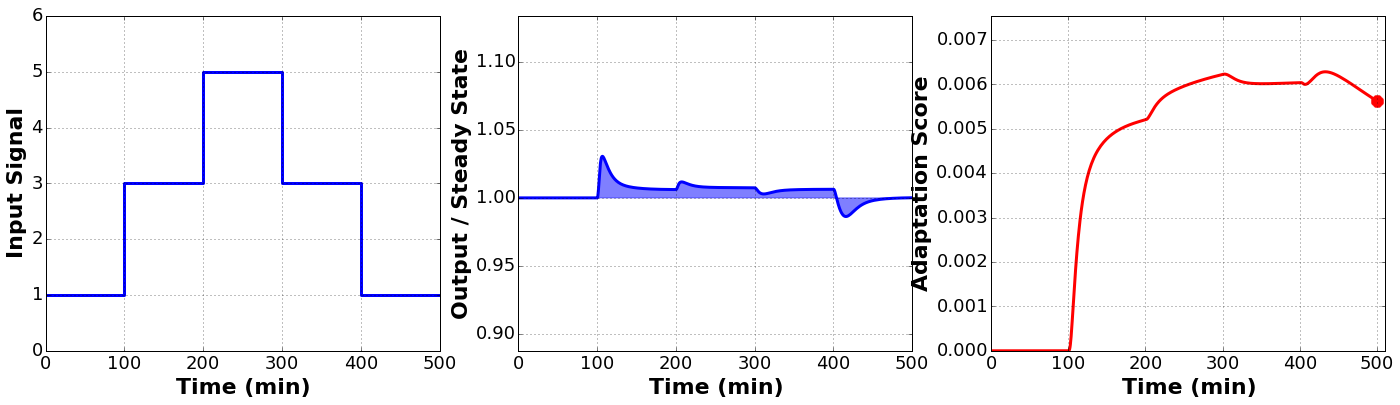

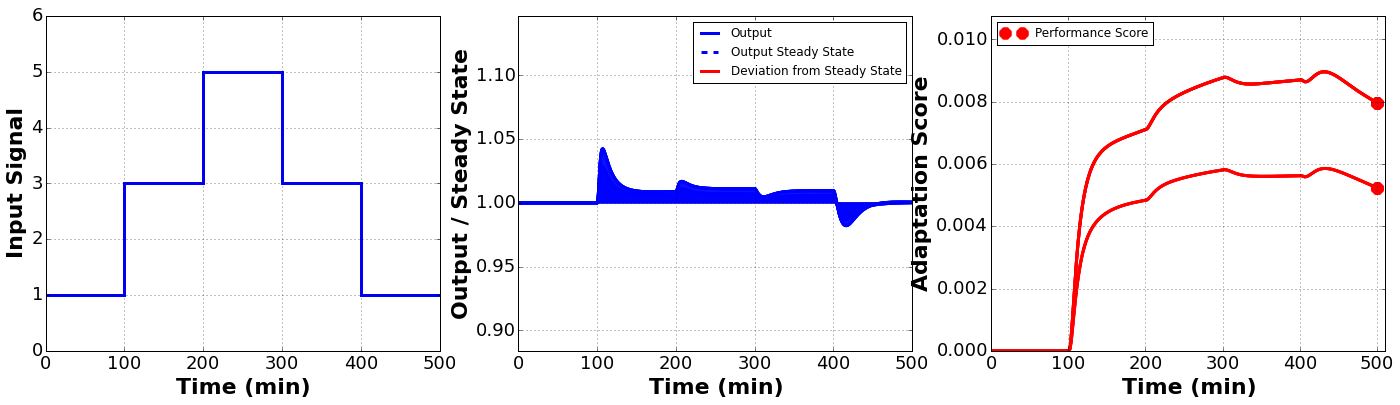

In [83]:
# run adaptation test
score, energy = adaptation_test(cell, input_node=2, output_node=1, input_random=False, plot=True)

# run robustness test
scores = robustness_test(cell, num_mutants=10, input_node=2, output_node=1, steady_states=None, plot=True)